# Data Wrangling Exercises
Using the repo setup directions, setup a new local and remote repository named ```clustering-exercises```. The local version of your repo should live inside of ```~/codeup-data-science```. This repo should be named ```clustering-exercises```.

Save your clustering work in your ```clustering-exercises``` repo. Then ```add```, ```commit```, and ```push``` your changes.

For example, if the exercise directs you to create a file named ```myfile.py```, you should have ```clustering/myfile.py``` in your repository.

If a file extension is specified, you should create that specific file. If there is no file extension specified, you may either create a python script or a jupyter notebook for the exercise.

    Workflow
    
    Throughout the exercises, you may wish to do your work in a notebook, then transfer any functions you've created to an external python script.
    
    Keep in mind this is not always a linear process! You will probably be cycling between a notebook and an external python script frequently.
    
    Remember to run your code often to check for correct output and/or errors.

In [1]:
# Imports Needed:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import wrangle_zillow as wz
import wrangle_mall as wm

## Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a ```zillow.ipynb``` file and a ```helper file``` for each section in the pipeline.

<div class="alert alert-success">

    
# Acquire and Summarize

<div class="alert alert-warning">


## 1. Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

**Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for** ```airconditioningtypeid```. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the ```.duplicated``` method) - Only include properties that have a **latitude** and **longitude** value.

In [2]:
df = wz.new_wrangle_zillow_2017()

In [3]:
df.head().T

,0,1,2,3,4
id,1727539,1387261,11677,2288172,781532
parcelid,14297519,17052889,14186244,12177905,12095076
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
bulding_class,None,None,None,None,None
heat_systems,None,None,None,Central,Central
land_use,Single Family Residential,Single Family Residential,Single Family Residential,Single Family Residential,Single Family Residential
story,None,None,None,None,None


<div class="alert alert-warning">


## 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
# shape
df.shape

(52319, 68)

In [5]:
# summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52319.0,1.496888e+06,8.594310e+05,3.490000e+02,7.575810e+05,1.500095e+06,2.241248e+06,2.982270e+06
parcelid,52319.0,1.299682e+07,3.350951e+06,1.071186e+07,1.151017e+07,1.257825e+07,1.413036e+07,1.676878e+08
airconditioningtypeid,13615.0,2.439589e+00,3.847925e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52319.0,2.300015e+00,1.022816e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52319.0,3.300770e+00,9.475632e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33654.0,6.264961e+00,1.716328e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52184.0,2.305276e+00,1.018076e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,389.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [7]:
df.isnull().sum().sort_values(ascending=False).head(55)

bulding_class                   52319
buildingclasstypeid             52319
finishedsquarefeet15            52319
finishedsquarefeet13            52319
storytypeid                     52272
basementsqft                    52272
story                           52272
yardbuildingsqft26              52256
architecturalstyletypeid        52249
architectural_style             52249
construction_type               52243
typeconstructiontypeid          52243
fireplaceflag                   52238
finishedsquarefeet6             52154
decktypeid                      51930
pooltypeid10                    51876
poolsizesum                     51454
pooltypeid2                     51248
hashottuborspa                  50805
yardbuildingsqft17              50384
taxdelinquencyyear              50251
taxdelinquencyflag              50251
finishedsquarefeet50            47948
finishedfloor1squarefeet        47948
threequarterbathnbr             45602
fireplacecnt                    45086
pooltypeid7 

(-1.0, 1.0)

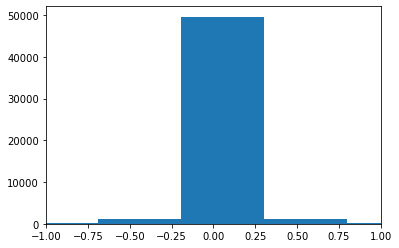

In [8]:
#Distribution of target variable
plt.hist(x=df['log_error'], bins=20)
plt.xlim(-1, 1)

<div class="alert alert-success">

    
# Personal Discovery in preparation for Project

In [9]:
df.latitude.isnull().sum()

0

In [10]:
df.longitude.isnull().sum()

0

In [11]:
df.parcelid.value_counts()

14297519    1
17237669    1
11839030    1
17148095    1
11311690    1
           ..
14138000    1
12026029    1
14212835    1
12213446    1
12826780    1
Name: parcelid, Length: 52319, dtype: int64

In [12]:
def column_stats(df, column_name):
    """
    This Function prints several helpful exploratory stats for the column passed as an argument.
    """
    
    COL_UNIQUE_COUNT = df[column_name].nunique()
    print(f'{column_name} contains {COL_UNIQUE_COUNT} unique values')
    print()

    RSLT_0 = df.loc[(df[column_name] == 0)]
    print(f'{column_name} contains {RSLT_0.shape[0]} records with a value equal to 0')
    print()

    ##### FILTER SINGLE CONDITION > 0
    RSLT_OVER_0 = df.loc[(df[column_name] > 0)]
    print(f'{column_name} contains {RSLT_OVER_0.shape[0]} records with a value greater than 0')
    print()
    
    COL_DESCRIBE = df[column_name].describe()
    print(f'{column_name} description statistics:')
    print(COL_DESCRIBE)
    print()
  
    ##### VALUE COUNTS
    print(f'{column_name} counts of each unique value:')
    print(df[column_name].value_counts())
    
def null_stats(df):
    """
    This Function will display the DataFrame row count, 
    the NULL/NaN row count, and the 
    percent of rows that would be dropped.
    """

    print('COUNT OF NULL/NaN PER COLUMN:')
    # set temporary conditions for this instance of code
    with pd.option_context('display.max_rows', None):
        # print count of nulls by column
        print(df.isnull().sum().sort_values(ascending=False))
    print()
    print(f'     DataFrame Row Count: {df.shape[0]}')
    print(f'      NULL/NaN Row Count: {df.shape[0] - df.dropna().shape[0]}')
    
    if df.shape[0] == df.dropna().shape[0]:
        print()
        print('Row Counts are the same')
        print('Drop NULL/NaN cannot be run')
    
    elif df.dropna().shape[0] == 0:
        print()
        print('This will remove all records from your DataFrame')
        print('Drop NULL/NaN cannot be run')
    
    else:
        print()
        print(f'  DataFrame Percent kept: {round((df.dropna().shape[0] / df.shape[0]), 4)}')
        print(f'NULL/NaN Percent dropped: {round(1 - (df.dropna().shape[0] / df.shape[0]), 4)}')

def check_duplicates(df):
    """
    This Function checks the DataFrame argument for duplicate ROWS and COLUMNS.

    COLUMNS:
    Function will keep the first duplicate column. 
    Function will ignore the Column Name.
    
    ROWS:
    Function will keep the first duplicate row. 
    Function will ignore the index (assuming that is primekey with no duplicates).
    
    Imports Needed:
    import pandas as pd
    """

    # Calculate count of Duplicate Columns
    column_list_original = df.columns
    colomn_count_original = df.shape[1]
    
    column_count_without_duplicates = df.T.drop_duplicates().T.shape[1]
    column_list_without_duplicates = df.T.drop_duplicates().T.columns
    
    column_count_of_duplicates = colomn_count_original - column_count_without_duplicates
    column_list_of_duplicates = list(set(column_list_original) - set(column_list_without_duplicates))
    
    if column_count_of_duplicates > 0:
        print(f'There are {column_count_of_duplicates} duplicate COLUMNS that need to be removed.')
        print(f'Copy, Paste, and Run the following Code: "df=df.T.drop_duplicates().T"')
        print()
        print(f'This is the list of Dupliacate Columns:')
        print(f'{column_list_of_duplicates}')
        
    else:
        print(f'There are {column_count_of_duplicates} duplicate COLUMNS.')
        print('No Action Needed.')
    print()
    print()
    
    # Calculate count of DuplicateRows
    row_count_original = df.shape[0]
    row_count_without_duplicates = df.drop_duplicates(ignore_index=True).shape[0]
    row_count_of_duplicates = row_count_original - row_count_without_duplicates
    
    if row_count_of_duplicates > 0:
        print(f'There are {row_count_of_duplicates} duplicate ROWS that need to be removed.')
        print(f'Copy, Paste, and Run the following Code: "df=df.drop_duplicates(ignore_index=True)"')
        
    else:
        print(f'There are {row_count_of_duplicates} duplicate ROWS.')
        print('No Action Needed.')

In [13]:
# Run the functions just built
column_stats(df, 'parcelid')

parcelid contains 52319 unique values

parcelid contains 0 records with a value equal to 0

parcelid contains 52319 records with a value greater than 0

parcelid description statistics:
count    5.231900e+04
mean     1.299682e+07
std      3.350951e+06
min      1.071186e+07
25%      1.151017e+07
50%      1.257825e+07
75%      1.413036e+07
max      1.676878e+08
Name: parcelid, dtype: float64

parcelid counts of each unique value:
14297519    1
17237669    1
11839030    1
17148095    1
11311690    1
           ..
14138000    1
12026029    1
14212835    1
12213446    1
12826780    1
Name: parcelid, Length: 52319, dtype: int64


In [14]:
# Run the functions just built
check_duplicates(df)

There are 3 duplicate COLUMNS that need to be removed.
Copy, Paste, and Run the following Code: "df=df.T.drop_duplicates().T"

This is the list of Dupliacate Columns:
['finishedsquarefeet15', 'bulding_class', 'finishedsquarefeet13']


There are 0 duplicate ROWS.
No Action Needed.


In [15]:
# Shows non-duplicate Row Count of Column
df.construction_type.drop_duplicates().shape[0]

3

In [16]:
# Shows Null Row Count of Column
df.construction_type.isnull().sum()

52243

In [17]:
# Shows Unique Row Count of Column
df.construction_type.nunique()

2

In [18]:
# Shows Unique Values of Column
df.construction_type.unique()

array([None, 'Frame', 'Concrete'], dtype=object)

In [19]:
# Shows non-duplicate Row Count of Column
df.construction_type.value_counts()

Frame       75
Concrete     1
Name: construction_type, dtype: int64

In [20]:
def column_stats(df, column_name):
    """
    """
    
    # Shows non-duplicate Value Count of Column
    print(f'There are {df[column_name].drop_duplicates().shape[0]} Non-duplicate values.')
    
    # Shows Null Value Count of Column
    print(f'There are {df[column_name].isnull().sum()} Null values.')
    
    # Calculate count of Whitespace
    row_count = df[column_name].shape[0]
    row_value_count = df[column_name].value_counts().sum()
    whitespace_count = row_count - row_value_count
    print (f'There are {whitespace_count} Whitespace characters.')
    print()
    
    # Shows Unique Value Count of Column
    print(f'There are {df[column_name].nunique()} Unique values.')
    print()
    
    # Shows Unique Values of Column
    print(f'These are the Unique Values: {df[column_name].unique()}')
    print()
    
    # Shows Unique Values of Column with Count of occurances
    print(f'These are the Unique Value Counts:\n{df[column_name].value_counts()}')

In [21]:
def column_whitespace(df, column_name):
    
    # Calculate count of Whitespace
    row_count = df[column_name].shape[0]
    row_value_count = df[column_name].value_counts().sum()
    whitespace_count = row_count - row_value_count
    print (f'There are {whitespace_count} Whitespace characters.')

<div class="alert alert-warning">


## MISC

In [22]:
# Show column stats
column_stats(df, 'construction_type')

There are 3 Non-duplicate values.
There are 52243 Null values.
There are 52243 Whitespace characters.

There are 2 Unique values.

These are the Unique Values: [None 'Frame' 'Concrete']

These are the Unique Value Counts:
Frame       75
Concrete     1
Name: construction_type, dtype: int64


In [23]:
# Show column stats
column_stats(df, 'unitcnt')

There are 4 Non-duplicate values.
There are 18558 Null values.
There are 18558 Whitespace characters.

There are 3 Unique values.

These are the Unique Values: [nan  1.  2.  3.]

These are the Unique Value Counts:
1.0    33733
2.0       27
3.0        1
Name: unitcnt, dtype: int64


In [24]:
# list columns
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

<div class="alert alert-warning">


## LOCATION
* parcelid
    * No Dupe
    * No Null
    * 52319 Unique
* rawcensustractandblock
    * No Dupe
    * No Null
    * 31441 Unique values
* censustractandblock
* regionidcity
* regionidcounty
* regionidneighborhood
* longitude
* latitude
* fips
* regionidzip

        12447 is the ID for city of LA. 
        I confirmed through sampling and plotting, as well as looking up a few addresses.
```df['cola'] = df['regionidcity'].apply(lambda x: 1 if x == 12447.0 else 0)```


In [25]:
# Run custom function
column_stats(df, 'parcelid')

There are 52319 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 52319 Unique values.

These are the Unique Values: [14297519 17052889 14186244 ... 17239384 12773139 12826780]

These are the Unique Value Counts:
14297519    1
17237669    1
11839030    1
17148095    1
11311690    1
           ..
14138000    1
12026029    1
14212835    1
12213446    1
12826780    1
Name: parcelid, Length: 52319, dtype: int64


In [26]:
# Run custom function
column_stats(df, 'rawcensustractandblock')

There are 31441 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 31441 Unique values.

These are the Unique Values: [60590630.072012   61110010.02300601 60590218.022012   ...
 60375548.022001   61110084.022016   60375034.02102   ]

These are the Unique Value Counts:
6.037920e+07    36
6.037920e+07    32
6.059032e+07    24
6.037142e+07    24
6.059032e+07    23
                ..
6.059075e+07     1
6.037504e+07     1
6.037540e+07     1
6.059099e+07     1
6.037503e+07     1
Name: rawcensustractandblock, Length: 31441, dtype: int64


In [27]:
# Run custom function
column_stats(df, 'censustractandblock')

There are 31405 Non-duplicate values.
There are 121 Null values.
There are 121 Whitespace characters.

There are 31404 Unique values.

These are the Unique Values: [6.05906301e+13 6.11100100e+13 6.05902180e+13 ... 6.03755480e+13
 6.11100840e+13 6.03750340e+13]

These are the Unique Value Counts:
6.037920e+13    32
6.037920e+13    27
6.059032e+13    24
6.037142e+13    24
6.059032e+13    23
                ..
6.037534e+13     1
6.037293e+13     1
6.037140e+13     1
6.037577e+13     1
6.037503e+13     1
Name: censustractandblock, Length: 31404, dtype: int64


In [28]:
# Run custom function
column_stats(df, 'regionidcity')

There are 176 Non-duplicate values.
There are 1036 Null values.
There are 1036 Whitespace characters.

There are 175 Unique values.

These are the Unique Values: [ 53571.  13091.  21412. 396551.  47019.  45457.  14634.  54311.  24832.
  13150.  32380.  17882.  25458.  52650.  12447.  46298.  40081.  54053.
  33252.  12520.  46080.  45888.  11626.  13693.  52835.  37015.  14111.
 118694.  34636.  17686.  25459.  20008.  39308.  12292.  38980.  27491.
  10723. 396054.  44833.  47568.  26531.  27183.  44116.  16764.   5534.
   4406.  24812.  18874.     nan  10734.  51239.  22827.  41673.  25953.
  17597.  10774.  12773.  52842.  50677.  26483.  25218.  40227.  15237.
  16961.  38032.  34543.  30187.  33837.  29189.  24174.  34780.  17150.
  50749.  10608.  37086.  16389.  34278.  40110.  51861.  53636.  26964.
  13716.  45602. 396556. 396550.  25974.  27110.  15554.  33836.  14542.
  47198.  55753.  19177.  54722.  33612. 118895.   8384.  42150. 118914.
   6021.  54299. 113576.  53655. 11

In [29]:
# Run custom function
column_stats(df, 'regionidcounty')

There are 3 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 3 Unique values.

These are the Unique Values: [1286. 2061. 3101.]

These are the Unique Value Counts:
3101.0    33823
1286.0    14111
2061.0     4385
Name: regionidcounty, dtype: int64


In [30]:
# Run custom function
column_stats(df, 'regionidneighborhood')

There are 438 Non-duplicate values.
There are 33338 Null values.
There are 33338 Whitespace characters.

There are 437 Unique values.

These are the Unique Values: [    nan 274684. 276258.  37739. 274815. 268496. 416316.  28119.  26134.
 274359. 276486.  51906.  41131.  46795. 274514. 274695. 268002.  41466.
 274358.  31817. 116646.  48570.  40215. 274049. 118208. 113749. 268551.
 268572. 275470. 268403.  13017.  48200. 268588. 275411. 268473. 115729.
 275979. 118872. 268548. 275496. 274765. 274800.  33183.  27080. 268144.
 113886. 268441.   6952. 114914. 417433. 762684. 268249. 273400. 275857.
 274517.  27484. 276606. 276157.  47950.  40548.  48516. 416320. 115836.
  32368. 416329. 416967. 115657. 113713.  54300. 113688. 416966. 276514.
 403192.  27987. 623381. 273263.  21056.  46736. 116415. 275300. 275567.
 113910. 116774. 273617. 276256. 275784.  47880. 273059.  13176. 114808.
  37835. 273539. 268134.  32059.  27431. 115609. 276476. 403191. 275396.
 268157.   7877. 275024. 416330. 

In [31]:
# Run custom function
column_stats(df, 'longitude')

There are 50763 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 50763 Unique values.

These are the Unique Values: [-1.17869207e+08 -1.19281531e+08 -1.17823170e+08 ... -1.18706327e+08
 -1.18038169e+08 -1.17996709e+08]

These are the Unique Value Counts:
-118249000.0    12
-118327000.0     7
-118172000.0     7
-117830000.0     7
-117835000.0     7
                ..
-118659512.0     1
-118132169.0     1
-117744674.0     1
-118287098.0     1
-117996709.0     1
Name: longitude, Length: 50763, dtype: int64


In [32]:
# Run custom function
column_stats(df, 'latitude')

There are 50477 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 50477 Unique values.

These are the Unique Values: [33634931. 34449266. 33886168. ... 34300140. 34040895. 33937685.]

These are the Unique Value Counts:
34047500.0    12
34487900.0     7
33494800.0     7
34101300.0     7
34041200.0     6
              ..
34185350.0     1
34296566.0     1
34077240.0     1
33853596.0     1
33937685.0     1
Name: latitude, Length: 50477, dtype: int64


<div class="alert alert-warning">


## fips Master

In [33]:
# Run custom function
column_stats(df, 'fips')

There are 3 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 3 Unique values.

These are the Unique Values: [6059. 6111. 6037.]

These are the Unique Value Counts:
6037.0    33823
6059.0    14111
6111.0     4385
Name: fips, dtype: int64


In [34]:
# Found a csv fips master list on github
# Read it in as a DataFrame using raw url
fips_url = 'https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv'
fips_df = pd.read_csv(fips_url)
    
# Cache data into a new csv file
fips_df.to_csv('fips_master.csv')

In [35]:
fips_df.T

,0,1,2,3,4,5,6,7,8,9,...,3185,3186,3187,3188,3189,3190,3191,3192,3193,3194
fips,0,1000,1001,1003,1005,1007,1009,1011,1013,1015,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
name,UNITED STATES,ALABAMA,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County,Bullock County,Butler County,Calhoun County,...,Niobrara County,Park County,Platte County,Sheridan County,Sublette County,Sweetwater County,Teton County,Uinta County,Washakie County,Weston County
state,NaN,NaN,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY


<div class="alert alert-warning">


## zipcode Master
* This turned out to be unusable

In [36]:
# Run custom function
column_stats(df, 'regionidzip')

There are 382 Non-duplicate values.
There are 26 Null values.
There are 26 Whitespace characters.

There are 381 Unique values.

These are the Unique Values: [ 96978.  97099.  97078.  96330.  96293.  96325.  96173.  96374.  97051.
  97107.  96962.  96003.  96971.  96954.  96018.  96237.  96957.  96352.
  96008.  97005.  96122.  97067.  96116.  96271.  96349.  96450.  96447.
  96000.  96291.  96133.  96486.  96361.  96983.  96998.  96414.  96464.
  96517.  96982.  96241.  96488.  96522.  96961.  96370.  96987.  96366.
  96387.  96507.  96506.  96494.  96212.  96337.  96049.  97018.  96229.
  97079.  96437.  95983.  96185.  96025.  96058.  97063.  96452.  97068.
  95984.  96280.  97003.  96389.  96208.  97024.  97318.  96101.  97041.
  96186.  96398.  97089.  96384.  96192.  97091.  96989.  96136.  96369.
  96206.  97106.  96378.  96342.  96995.  96426.  96020.  96401.  96969.
  96137.  96024.  96956.  96531.  96197.  96981.  96967.  96980.  96943.
  97328.  97020.  97048.  96183.  96451

In [37]:
# Found a csv zipcode master list on gihub
# Read it in as a DataFrame using raw url

zip_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'
zip_df = pd.read_csv(zip_url)
    
# Cache data into a new csv file
zip_df.to_csv('zipcode_master.csv')

In [38]:
zip_df.T

,0,1,2,3,4,5,6,7,8,9,...,33093,33094,33095,33096,33097,33098,33099,33100,33101,33102
state_fips,1,1,1,1,1,1,1,1,1,1,...,56,56,56,56,56,56,56,56,56,56
state,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
state_abbr,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
zipcode,35004,35005,35006,35007,35010,35014,35016,35019,35020,35022,...,83120,83121,83122,83123,83124,83126,83127,83128,831HH,831XX
county,St. Clair,Jefferson,Jefferson,Shelby,Tallapoosa,Talladega,Marshall,Cullman,Jefferson,Jefferson,...,Lincoln,Lincoln,Lincoln,Lincoln,Lincoln,Lincoln,Lincoln,Lincoln,Lincoln,Lincoln
city,Acmar,Adamsville,Adger,Keystone,New site,Alpine,Arab,Baileyton,Bessemer,Zcta 35022,...,Freedom,Frontier,Grover,La barge,Opal,Smoot,Thayne,Alpine,Zcta 831hh,Zcta 831xx


<div class="alert alert-warning">


## BATHROOMS
* bathroomcnt
* fullbathcnt
* calculatedbathnbr
* threequarterbathnbr

In [39]:
# Run custom function
column_stats(df, 'bathroomcnt')

There are 22 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 22 Unique values.

These are the Unique Values: [ 3.5  1.   2.   3.   2.5  4.5  4.   5.   6.5  1.5  6.   0.   5.5  9.
  8.   7.  10.  11.  18.   7.5 13.   8.5]

These are the Unique Value Counts:
2.0     21839
3.0     10650
1.0      9536
2.5      3932
4.0      2225
3.5       916
1.5       839
5.0       803
4.5       686
6.0       320
5.5       224
0.0       119
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathroomcnt, dtype: int64


In [40]:
# Run custom function
column_stats(df, 'threequarterbathnbr')

There are 5 Non-duplicate values.
There are 45602 Null values.
There are 45602 Whitespace characters.

There are 4 Unique values.

These are the Unique Values: [ 1. nan  2.  7.  3.]

These are the Unique Value Counts:
1.0    6638
2.0      70
3.0       8
7.0       1
Name: threequarterbathnbr, dtype: int64


In [41]:
column_stats(df, 'calculatedbathnbr')

There are 22 Non-duplicate values.
There are 135 Null values.
There are 135 Whitespace characters.

There are 21 Unique values.

These are the Unique Values: [ 3.5  1.   2.   3.   2.5  4.5  4.   5.   6.5  1.5  6.   nan  5.5  9.
  8.   7.  10.  11.  18.   7.5 13.   8.5]

These are the Unique Value Counts:
2.0     21839
3.0     10650
1.0      9536
2.5      3924
4.0      2225
3.5       916
1.5       832
5.0       803
4.5       686
6.0       320
5.5       223
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: calculatedbathnbr, dtype: int64


In [42]:
# Run custom function
column_stats(df, 'fullbathcnt')

There are 14 Non-duplicate values.
There are 135 Null values.
There are 135 Whitespace characters.

There are 13 Unique values.

These are the Unique Values: [ 3.  1.  2.  4.  5.  6. nan  9.  8.  7. 10. 11. 18. 13.]

These are the Unique Value Counts:
2.0     25775
3.0     11575
1.0     10368
4.0      2912
5.0      1022
6.0       357
7.0        96
8.0        56
9.0        13
10.0        5
11.0        3
18.0        1
13.0        1
Name: fullbathcnt, dtype: int64


In [43]:
# Run custom function
null_stats(df)

COUNT OF NULL/NaN PER COLUMN:
bulding_class                   52319
buildingclasstypeid             52319
finishedsquarefeet15            52319
finishedsquarefeet13            52319
storytypeid                     52272
basementsqft                    52272
story                           52272
yardbuildingsqft26              52256
architecturalstyletypeid        52249
architectural_style             52249
construction_type               52243
typeconstructiontypeid          52243
fireplaceflag                   52238
finishedsquarefeet6             52154
decktypeid                      51930
pooltypeid10                    51876
poolsizesum                     51454
pooltypeid2                     51248
hashottuborspa                  50805
yardbuildingsqft17              50384
taxdelinquencyyear              50251
taxdelinquencyflag              50251
finishedsquarefeet50            47948
finishedfloor1squarefeet        47948
threequarterbathnbr             45602
fireplacecnt        

In [44]:
# Shows non-duplicate Row Count of Column
df.parcelid.drop_duplicates().shape[0]

52319

<div class="alert alert-warning">


### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

The output should look like the table below:

|  |num_rows_missing|pct_rows_missing|
|:-|---------------:|---------------:|
|parcelid|	0|	0.000000|
|airconditioningtypeid|	29041|	0.535486|
|architecturalstyletypeid|	54232|	0.999982|

In [45]:
# Define function to calculate number and percent of null values from each column
def null_counter(df):
    
    new_columns = ['feature', 'null_record_count', 'pct_null']
    
    null_df = pd.DataFrame(columns=new_columns)
    
    for col in list(df.columns):
        null_counts = df[col].isna().sum()
        pct_null = null_counts / df.shape[0]
        
        add_df = pd.DataFrame([{'feature': col, 'null_record_count': null_counts,
                               'pct_null': pct_null}])
        
        null_df = pd.concat([null_df, add_df], axis=0)
        
    null_df.set_index('feature', inplace=True)
    
    return null_df

In [46]:
null_df = null_counter(df)
null_df.head(55)

,null_record_count,pct_null
feature,,
id,0,0.0
parcelid,0,0.0
airconditioningtypeid,38704,0.739769
architecturalstyletypeid,52249,0.998662
basementsqft,52272,0.999102
bathroomcnt,0,0.0
bedroomcnt,0,0.0
buildingclasstypeid,52319,1.0
buildingqualitytypeid,18665,0.356754


In [47]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, id to construction_type
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   null_record_count  68 non-null     object
 1   pct_null           68 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


<div class="alert alert-success">


# Prepare

<div class="alert alert-warning">


### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [48]:
def remove_outliers(df):
    """
    filter down outliers to more accurately align with realistic expectations of a Single Family Residence
    """
    
    #Set no_outliers equal to df
    no_outliers = df

    # Keep all homes that have > 0 and <= 8 Beds and Baths
    no_outliers = no_outliers[no_outliers.bedroomcnt > 0]
    no_outliers = no_outliers[no_outliers.bathroomcnt > 0]
    no_outliers = no_outliers[no_outliers.bedroomcnt <= 8]
    no_outliers = no_outliers[no_outliers.bathroomcnt <= 8]
    
    # Keep all homes that have tax value > 30 thousand and <= 2 million
    no_outliers = no_outliers[no_outliers.taxvaluedollarcnt >= 40_000]
    no_outliers = no_outliers[no_outliers.taxvaluedollarcnt <= 2_000_000]
    
    # Keep all homes that have sqft > 8 hundred and < 10 thousand
    no_outliers = no_outliers[no_outliers.calculatedfinishedsquarefeet > 800]
    no_outliers = no_outliers[no_outliers.calculatedfinishedsquarefeet < 10_000]

    # Assign no_outliers back to the DataFrame
    df = no_outliers
    
    return df

In [49]:
df = remove_outliers(df)

In [50]:
df.bedroomcnt.max()

8.0

<div class="alert alert-warning">


### 2. Create a function that will drop rows or columns based on the percent of values that are missing: ```handle_missing_values(df, prop_required_column, prop_required_row)```.

* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
* hint:
    * Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [51]:
# Define function to drop columns/rows based on proportion of nulls
def drop_nulls(df, pct_null_for_column_drop, pct_null_for_row_drop):
    
    prop_null_column = 1 - pct_null_for_column_drop
    
    for col in list(df.columns):
      
        null_counts = df[col].isnull().sum()
        null_pct = null_counts / df.shape[0]
        
        if null_pct > prop_null_column:
            df.drop(columns=col, inplace=True)
            
    row_threshold = int(pct_null_for_row_drop * df.shape[1])
    
    df.dropna(axis=0, thresh=row_threshold, inplace=True)
    
    return df

In [52]:
df.shape

(48959, 68)

In [53]:
# show my null counts by column
df.isnull().sum().sort_values(ascending=False).head(50)

finishedsquarefeet13          48959
buildingclasstypeid           48959
bulding_class                 48959
finishedsquarefeet15          48959
storytypeid                   48914
basementsqft                  48914
story                         48914
yardbuildingsqft26            48900
architectural_style           48894
architecturalstyletypeid      48894
construction_type             48888
typeconstructiontypeid        48888
fireplaceflag                 48883
finishedsquarefeet6           48850
decktypeid                    48590
pooltypeid10                  48543
poolsizesum                   48125
pooltypeid2                   48020
hashottuborspa                47604
taxdelinquencyflag            47136
taxdelinquencyyear            47136
yardbuildingsqft17            47071
finishedfloor1squarefeet      44703
finishedsquarefeet50          44703
threequarterbathnbr           42567
fireplacecnt                  41862
pooltypeid7                   39658
poolcnt                     

In [54]:
# pct of column nulls I want to address
17593/df.shape[0]

0.359341489818011

<div class="alert alert-danger">



# This gives me an error I cannot resolve
# I bypassed by using value count for threshold instead of percent
clean_df = drop_nulls(df, 0.75, 0.75)
# ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<div class="alert alert-warning">


### 3. Encapsulate your work inside of functions in a ```wrangle_zillow.py``` module.

In [55]:
zillow_df = wz.wrangle_zillow()

In [56]:
zillow_df.head().T

,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,12095076
bedrooms,4.0,2.0,3.0,4.0,4.0
bathrooms,3.5,1.0,2.0,3.0,3.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0
fullbathcnt,3.0,1.0,2.0,3.0,3.0
age,19.0,50.0,55.0,47.0,67.0
yearbuilt,1998.0,1967.0,1962.0,1970.0,1950.0
has_basement,0,0,0,0,0
has_deck,0,0,0,0,0
has_fireplace,0,1,0,0,0


In [57]:
zillow_df.isnull().sum()

parcelid                  0
bedrooms                  0
bathrooms                 0
calculatedbathnbr         0
fullbathcnt               0
age                       0
yearbuilt                 0
has_basement              0
has_deck                  0
has_fireplace             0
has_garage                0
has_hottuborspa           0
has_pool                  0
optional_features         0
has_taxdelinquency        0
fips                      0
state                     0
county                    0
la_county                 0
orange_county             0
ventura_county            0
longitude                 0
latitude                  0
zipcode                   0
regionidcounty            0
rawcensustractandblock    0
censustractandblock       0
sqft                      0
lot_sqft                  0
tax_value_bldg            0
tax_value                 0
tax_value_land            0
taxamount                 0
log_error                 0
abs_log_error             0
dtype: int64

<div class="alert alert-success">


## Mall Customers

<div class="alert alert-warning">


### 1. Acquire data from the customers table in the ```mall_customers``` database.

In [58]:
query = "SELECT * FROM customers"
url = wz.get_db_url('mall_customers')

In [59]:
mall_df = pd.read_sql(query, url)

In [60]:
mall_df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
customer_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female,...,Female,Female,Male,Female,Female,Female,Female,Male,Male,Male
age,19,21,20,23,31,22,35,23,64,30,...,34,32,33,38,47,35,45,32,32,30
annual_income,15,15,16,16,17,17,18,18,19,19,...,103,103,113,113,120,120,126,126,137,137
spending_score,39,81,6,77,40,76,6,94,3,72,...,23,69,8,91,16,79,28,74,18,83


<div class="alert alert-warning">

    
### 2. Summarize the data (include distributions and descriptive statistics).

In [61]:
# shape
mall_df.shape

(200, 5)

In [62]:
# summary stats
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [63]:
# info
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
# Count of null by column
mall_df.isnull().sum().sort_values(ascending=False).head(55)

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

(array([ 9.,  7., 12.,  8.,  3.,  7.,  9.,  8., 17., 18., 17., 20.,  6.,
         5., 11., 13.,  5.,  9., 10.,  6.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ,
        54.9, 59.8, 64.7, 69.6, 74.5, 79.4, 84.3, 89.2, 94.1, 99. ]),
 <BarContainer object of 20 artists>)

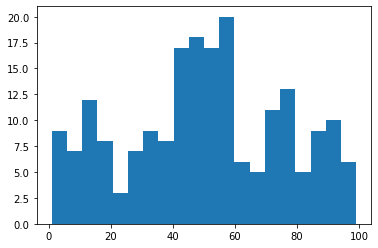

In [65]:
#Distribution of target variable
plt.hist(x = mall_df['spending_score'], bins=20)

<div class="alert alert-warning">


### 3. Detect outliers using IQR.

In [66]:
def check_column_outliers(df, column_name):
    """
    Creates a DataFrame to show outlier records based on  InterQuartile Range (IQR)
    """
    
    name = column_name
    name_q1, name_q3 = df[column_name].quantile([0.25, 0.75])
    
    name_iqr = name_q3 - name_q1
    
    name_upper = name_q3 + (name_iqr * 1.5)
    name_lower = name_q1 - (name_iqr * 1.5)
    
    return df[df[column_name] > name_upper]

In [67]:
# check for outliers using custom IQR Function
check_column_outliers(mall_df, 'age')

,customer_id,gender,age,annual_income,spending_score


In [68]:
# check for outliers using custom IQR Function
check_column_outliers(mall_df, 'spending_score')

,customer_id,gender,age,annual_income,spending_score


In [69]:
# check for outliers using custom IQR Function
check_column_outliers(mall_df, 'annual_income')

,customer_id,gender,age,annual_income,spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


<div class="alert alert-warning">


### 4. Split data into train, validate, and test.

In [70]:
train, validate, test = wz.split(mall_df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (200, 5)

      Train: (120, 5) - 60.0%
   Validate: (40, 5) - 20.0%
       Test: (40, 5) - 20.0%


<div class="alert alert-warning">


### 5. Encode categorical columns using a one hot encoder (```pd.get_dummies```).

In [71]:
def encode(df, column_name):
    """Use pandas dummies to pivot features with more than two string values
    into multiple columns with binary int values that can be read as boolean
    drop_first = False in draft for human readability; Final will have it set to True.
    """
    
    dummy_df = pd.get_dummies(data=df[[column_name]], drop_first=False)
    
    # Assign dummies to DataFrame
    df = pd.concat([df, dummy_df], axis=1)
    
    # Drop dummy Columns 
    df = df.drop(columns=column_name)
    
    return df

In [72]:
mall_df = encode(mall_df, 'gender')

In [73]:
mall_df

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


<div class="alert alert-warning">


### 6. Handles missing values.

In [74]:
def check_whitespace(df):
    """
    This Function checks the DataFrame argument for whitespace,
    replaces any that exist with NaN, then returns report.
    
    Imports Needed:
    import numpy as np
    """
    
    # Calculate count of Whitespace
    row_count = df.shape[0]
    column_list = df.columns
    row_value_count = df[column_list].value_counts().sum()
    whitespace_count = row_count - row_value_count

    # Collect Row count of isnull before cleaning whiitespace    
    isnull_before = df.dropna().shape[0]
    
    # Clean the Whitespace
    if whitespace_count > 0:
        df = df.replace(r'^\s*$', np.NaN, regex=True)

    # Collect Row count of isnull after cleaning whiitespace    
    isnull_after = df.dropna().shape[0]
    
    # Report of Whitespace affect on NULL/NaN row count
    print (f'Cleaning {whitespace_count} Whitespace characters found and replaced with NULL/NaN.')
    print(f'Resulting in {isnull_before - isnull_after} additional rows containing NULL/NaN.')
    print()
    print()
    
    # set temporary conditions for this instance of code    
    with pd.option_context('display.max_rows', None):
        # print count of nulls by column
        print('COUNT OF NULL/NaN PER COLUMN:')
        print(df.isnull().sum().sort_values(ascending=False))


In [75]:
def null_stats(df):
    """
    This Function will display the DataFrame row count, 
    the NULL/NaN row count, and the 
    percent of rows that would be dropped.
    """

    print('COUNT OF NULL/NaN PER COLUMN:')
    # set temporary conditions for this instance of code
    with pd.option_context('display.max_rows', None):
        # print count of nulls by column
        print(df.isnull().sum().sort_values(ascending=False))
    print()
    print(f'     DataFrame Row Count: {df.shape[0]}')
    print(f'      NULL/NaN Row Count: {df.shape[0] - df.dropna().shape[0]}')
    
    if df.shape[0] == df.dropna().shape[0]:
        print()
        print('Row Counts are the same')
        print('Drop NULL/NaN cannot be run')
    
    elif df.dropna().shape[0] == 0:
        print()
        print('This will remove all records from your DataFrame')
        print('Drop NULL/NaN cannot be run')
    
    else:
        print()
        print(f'  DataFrame Percent kept: {round((df.dropna().shape[0] / df.shape[0]), 4)}')
        print(f'NULL/NaN Percent dropped: {round(1 - (df.dropna().shape[0] / df.shape[0]), 4)}')


In [76]:
check_whitespace(mall_df)

Cleaning 0 Whitespace characters found and replaced with NULL/NaN.
Resulting in 0 additional rows containing NULL/NaN.


COUNT OF NULL/NaN PER COLUMN:
customer_id       0
age               0
annual_income     0
spending_score    0
gender_Female     0
gender_Male       0
dtype: int64


In [77]:
null_stats(mall_df)

COUNT OF NULL/NaN PER COLUMN:
customer_id       0
age               0
annual_income     0
spending_score    0
gender_Female     0
gender_Male       0
dtype: int64

     DataFrame Row Count: 200
      NULL/NaN Row Count: 0

Row Counts are the same
Drop NULL/NaN cannot be run


<div class="alert alert-warning">


### 7. Scaling

In [78]:
columns_to_scale = ['age','annual_income','spending_score']
scaler = MinMaxScaler()

train_scaled, validate_scaled, test_scaled, = wz.scale_data(train,
                                                            validate, 
                                                            test, 
                                                            columns_to_scale,
                                                            scaler,
                                                            return_scaler = False)

In [79]:
print(train_scaled.shape)
print(validate_scaled.shape)
print(test_scaled.shape)

(120, 5)
(40, 5)
(40, 5)


In [80]:
train_scaled

,customer_id,gender,age,annual_income,spending_score
0,102,Female,0.596154,0.385246,0.468750
1,114,Male,0.019231,0.401639,0.447917
2,86,Male,0.576923,0.319672,0.447917
3,67,Female,0.480769,0.270492,0.489583
4,88,Female,0.076923,0.344262,0.541667
...,...,...,...,...,...
115,94,Female,0.423077,0.368852,0.385417
116,178,Male,0.173077,0.598361,0.687500
117,98,Female,0.173077,0.368852,0.489583
118,134,Female,0.250000,0.467213,0.708333


<div class="alert alert-warning">


### 8. Encapsulate your work in a ```wrangle_mall.py``` module.

In [81]:
mall_by_py_df = wm.wrangle_mall_data()

In [82]:
# check for outliers using custom IQR Function
wm.check_column_outliers(mall_by_py_df, 'annual_income')

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
198,199,32,137,18,0,1
199,200,30,137,83,0,1


In [83]:
train, validate, test = wz.split(mall_by_py_df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (200, 6)

      Train: (120, 6) - 60.0%
   Validate: (40, 6) - 20.0%
       Test: (40, 6) - 20.0%


In [84]:
wm.check_whitespace(mall_by_py_df)

Cleaning 0 Whitespace characters found and replaced with NULL/NaN.
Resulting in 0 additional rows containing NULL/NaN.


COUNT OF NULL/NaN PER COLUMN:
customer_id       0
age               0
annual_income     0
spending_score    0
gender_Female     0
gender_Male       0
dtype: int64


In [85]:
wm.null_stats(mall_by_py_df)

COUNT OF NULL/NaN PER COLUMN:
customer_id       0
age               0
annual_income     0
spending_score    0
gender_Female     0
gender_Male       0
dtype: int64

     DataFrame Row Count: 200
      NULL/NaN Row Count: 0

Row Counts are the same
Drop NULL/NaN cannot be run
